# Exploratory Data Analysis

## Introduction

The purpose of this EDA is to gain insights into the Washington, DC real estate market. We will analyze key property attributes such as price, number of bedrooms, bathrooms, area (square footage), and status type (e.g., for sale or sold). Our goal is to uncover patterns, trends, and relationships among these features to understand the dynamics of the market better. Additionally, the findings will guide the development of a real estate chatbot that uses the dataset for client engagement, follow-up, and recommendations.



### Import and Load the Dataset

In [1]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
#Loading the Clean & Transformed Data
path = ('../data/heavy_cleaned_real_estate_data.csv')
heavy_real_estate_data = pd.read_csv(path)

In [3]:
heavy_real_estate_data.head()

,city,state,zipcode,bedrooms,bathrooms,price,yearBuilt,lotSize,livingArea,daysOnZillow,...,longitude,homeType,streetAddress,zestimate,propertyTaxRate,bedrooms_missing,bathrooms_missing,yearBuilt_missing,livingArea_missing,price_per_sqft
0,Washington,DC,20001,3.0,2.0,849500,1907.0,1499.000000,1950.0,0,...,-77.01239,TOWNHOUSE,1536 1st St NW,NaN,0.58,0,0,0,0,435.641026
1,Washington,DC,20002,3.0,3.0,925000,1912.0,1008.000000,1360.0,4,...,-76.99799,TOWNHOUSE,605 Acker Pl NE,986100.0,0.58,0,0,0,0,680.147059
2,Washington,DC,20010,5.0,5.0,1069000,1910.0,1254.000000,2344.0,1,...,-77.02516,SINGLE_FAMILY,824 Otis Pl NW,1085300.0,0.58,0,0,0,0,456.058020
3,Washington,DC,20024,1.0,2.0,860000,2020.0,9278.752392,883.0,0,...,-77.01182,CONDO,88 V St SW APT 807,858500.0,0.58,0,0,0,0,973.952435
4,Washington,DC,20011,2.0,2.0,324900,1920.0,9278.752392,1001.0,553,...,-77.03383,TOWNHOUSE,1422 Shepherd St NW #1,NaN,0.58,0,0,0,0,324.575425


### Descriptive Analysis Questions
A series of questions designed to explore distributions, central tendencies, and basic patterns in the data. The questions we will be answering are:
1. What is the distribution of property prices?
2. How do the number of bedrooms and bathrooms influence property prices?
3. What is the distribution of property sizes (area)?
4. How does the property type vary across price ranges?
5. Are properties built by specific builders more expensive on average? N/A 
6. Are there properties with undisclosed addresses, and how do they differ in price or size? N/A


### Descriptive Statistics
To showcase the descriptive statistics we can use the .describe method to answer a few questions and take a look at distribution among items.


In [4]:
heavy_real_estate_data.describe()

,zipcode,bedrooms,bathrooms,price,yearBuilt,lotSize,livingArea,daysOnZillow,monthlyHoaFee,latitude,longitude,zestimate,propertyTaxRate,bedrooms_missing,bathrooms_missing,yearBuilt_missing,livingArea_missing,price_per_sqft
count,5181.000000,5181.000000,5181.000000,5.181000e+03,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,3.926000e+03,5181.000000,5181.0,5181.0,5181.0,5181.0,5171.000000
mean,20727.059448,3.357653,3.138197,1.245802e+06,1973.185485,9278.752392,2073.093418,64.332947,292.568230,38.914635,-77.069553,1.125978e+06,0.733447,0.0,0.0,0.0,0.0,inf
std,899.647756,2.084057,1.906859,1.552294e+06,41.626193,16957.970311,2091.693498,105.854093,645.721014,0.056717,0.104781,1.150566e+06,0.226936,0.0,0.0,0.0,0.0,NaN
min,8094.000000,0.000000,0.000000,0.000000e+00,1787.000000,0.000000,0.000000,0.000000,0.000000,38.775900,-77.501070,5.920000e+04,0.000000,0.0,0.0,0.0,0.0,17.217631
25%,20010.000000,2.000000,2.000000,4.389000e+05,1941.000000,4675.000000,840.000000,11.000000,0.000000,38.881080,-77.120450,4.311000e+05,0.580000,0.0,0.0,0.0,0.0,342.140931
50%,20148.000000,3.000000,3.000000,7.490000e+05,1971.000000,9278.752392,1452.000000,33.000000,0.000000,38.910490,-77.042550,7.266000e+05,0.580000,0.0,0.0,0.0,0.0,472.150633
75%,20912.000000,5.000000,4.000000,1.590000e+06,2018.000000,9278.752392,2460.000000,71.000000,390.000000,38.944840,-76.999700,1.419775e+06,0.970000,0.0,0.0,0.0,0.0,672.825960
max,23306.000000,48.000000,14.000000,2.995000e+07,2024.000000,785386.000000,34807.000000,1629.000000,13462.000000,39.093440,-76.865920,1.778460e+07,1.070000,0.0,0.0,0.0,0.0,inf


## Answering the Descriptive Analysis Questions

### What is the distribution of property prices?


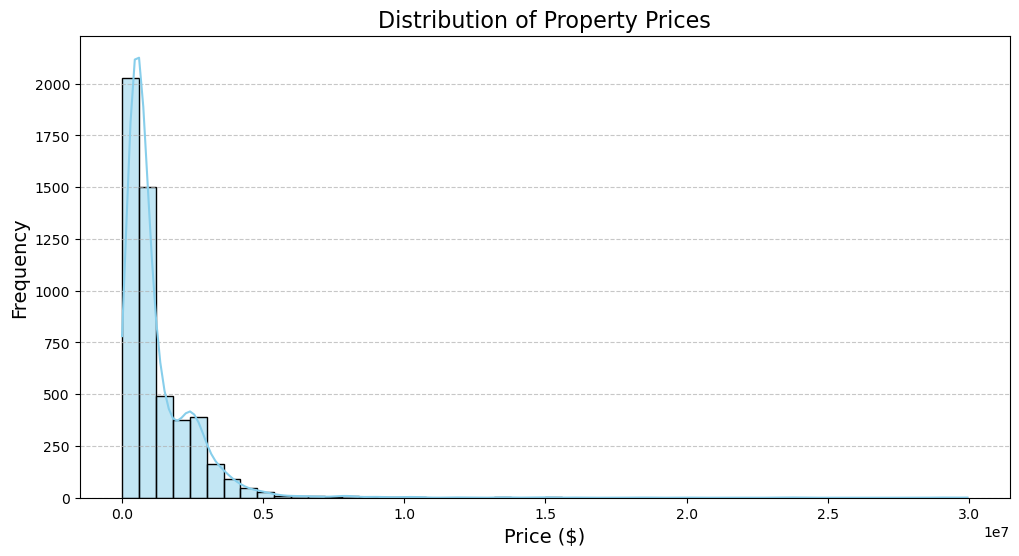

In [5]:
# Plotting the distribution of property prices
plt.figure(figsize=(12, 6))
sns.histplot(heavy_real_estate_data['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Property Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Similar to the light eda and inferential with a skewed right analysis indicating that most properties are priced at the lower end of the spectrum, while a few properties have significantly higher prices. 

### How do the number of bedrooms and bathrooms influence property prices?

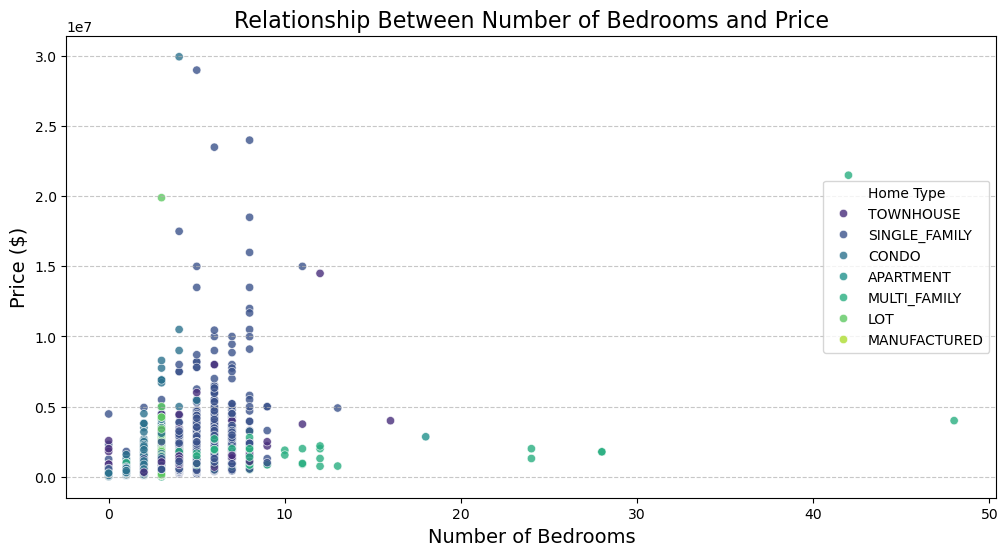

In [6]:
# Scatter plot for price vs. bedrooms
plt.figure(figsize=(12, 6))
sns.scatterplot(data=heavy_real_estate_data, x='bedrooms', y='price', hue='homeType', palette='viridis', alpha=0.8)
plt.title('Relationship Between Number of Bedrooms and Price', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Home Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Also, similar results with the property prices using binning, confirming that most prices cluster between $0.2 million and $0.4 million. The smooth trend line indicates the presence of a right skew, suggesting that extreme high prices are less frequent but impactful. Property prices mostly range from $0.2 million to $0.4 million, with fewer properties exceeding this range.

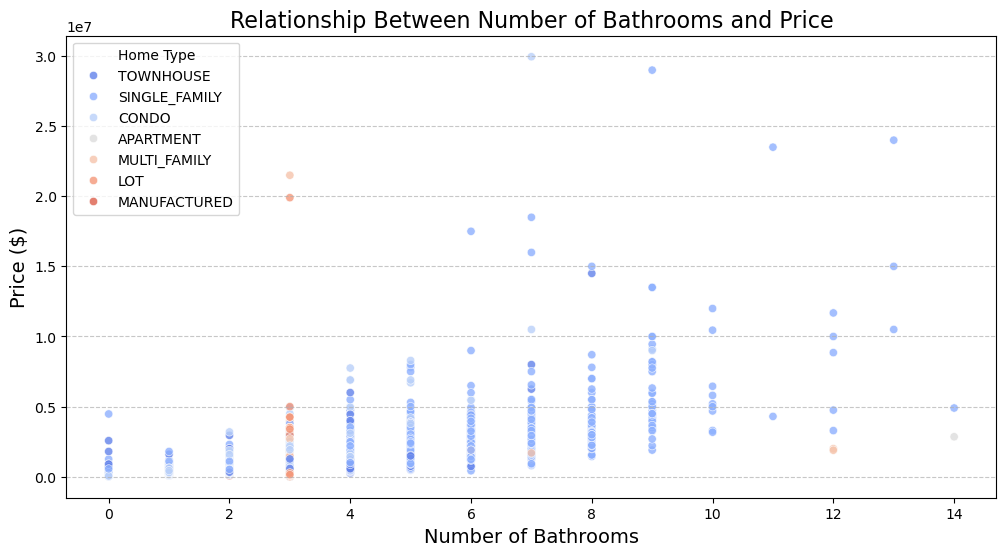

In [7]:

# Scatter plot for price vs. bathrooms
plt.figure(figsize=(12, 6))
sns.scatterplot(data=heavy_real_estate_data, x='bathrooms', y='price', hue='homeType', palette='coolwarm', alpha=0.8)
plt.title('Relationship Between Number of Bathrooms and Price', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Home Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The third graph illustrates a positive correlation between the number of bathrooms and property price, with properties featuring more bathrooms generally commanding higher prices. 

### What is the distribution of property sizes (area)?

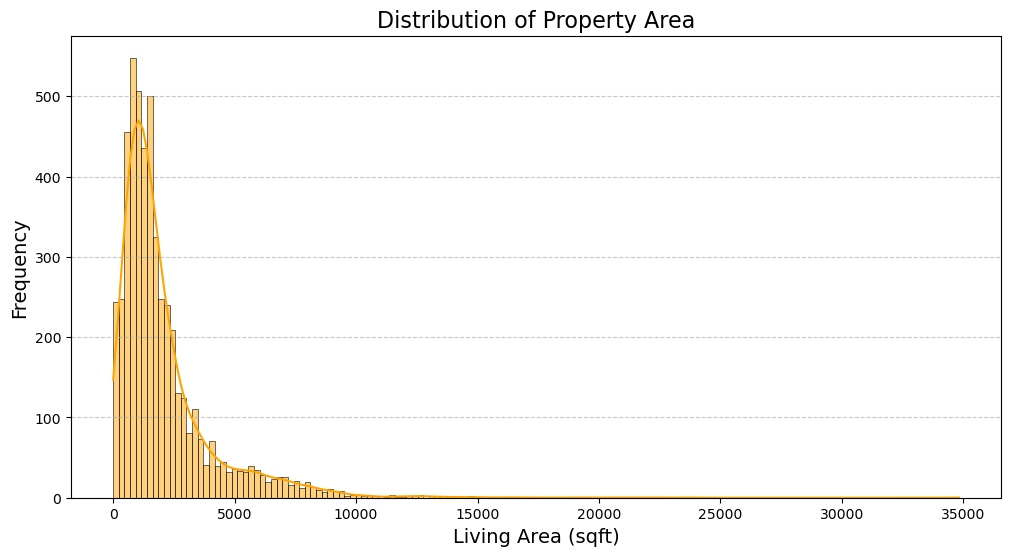

In [8]:
# Plotting the distribution of property area
plt.figure(figsize=(12, 6))
sns.histplot(heavy_real_estate_data['livingArea'], bins=150, kde=True, color='orange')
plt.title('Distribution of Property Area', fontsize=16)
plt.xlabel('Living Area (sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


With a right-skewed distribution, indicates that most properties have smaller areas, while only a few have significantly larger sizes. This skewness suggests that larger properties are less common but could represent luxury homes or large estates.

### How does property type vary across price ranges?

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_49995/1813450995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heavy_real_estate_data, x='homeType', y='price', palette='Set2')


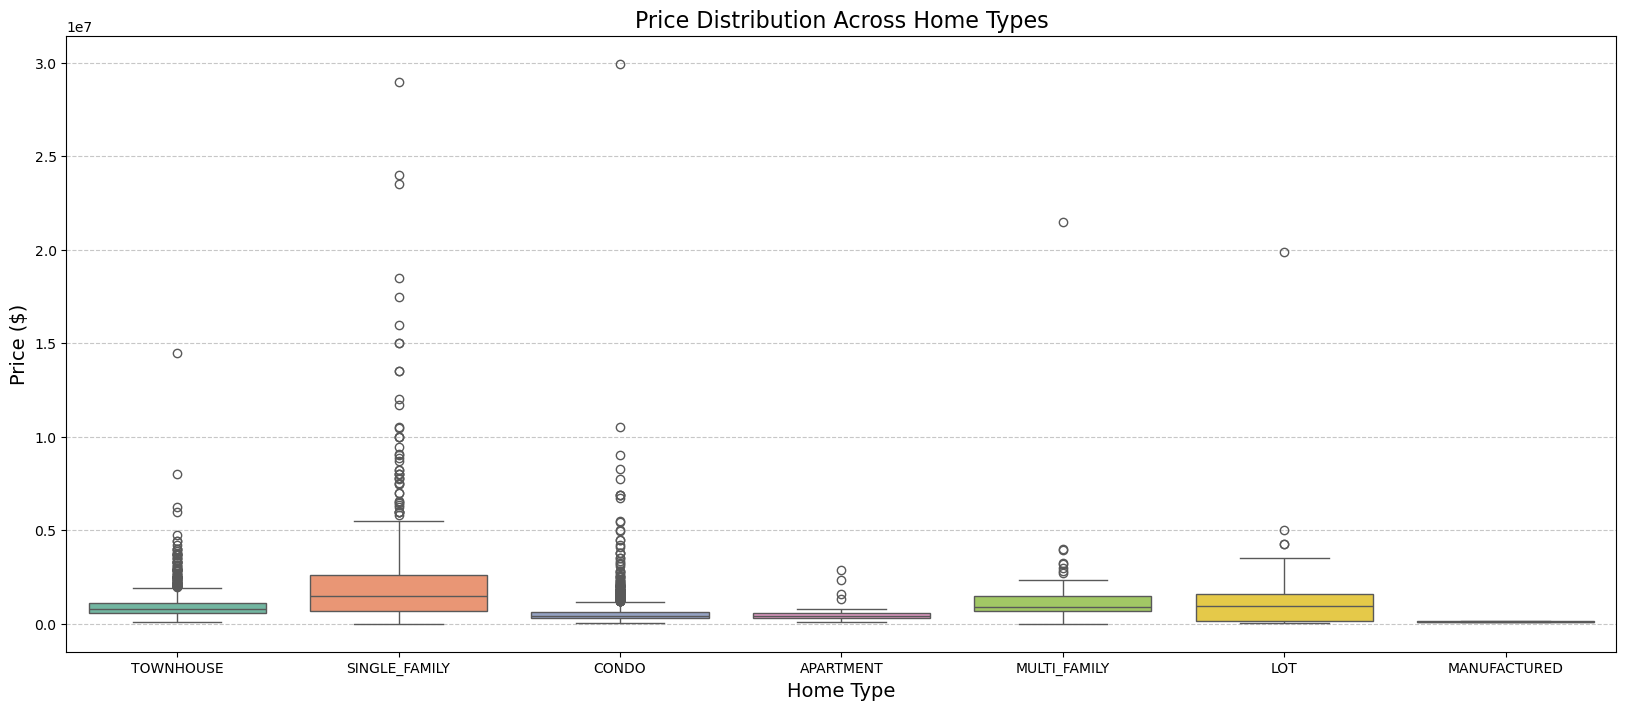

In [12]:
# Box plot for price vs. statusType
plt.figure(figsize=(20, 8))
sns.boxplot(data=heavy_real_estate_data, x='homeType', y='price', palette='Set2')
plt.title('Price Distribution Across Home Types', fontsize=16)
plt.xlabel('Home Type', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In analyzing how property type varies across price ranges, the box plot reveals that Single Family and Condo properties exhibit the most significant variance in prices. These two categories also show the most outliers, indicating that there are extreme price values within each type.

- Single Family homes account for the largest portion of the data (2090 properties), with a wide price range, some of which are extreme outliers.
- Condo properties (1746) show a similar pattern with high variability in price, also featuring many outliers.

Other property types, such as Townhouses and Multi-Family homes, show less price variability compared to single-family homes and condos. The data suggests that both Single Family and Condo properties are subject to greater fluctuations in price, possibly due to differences in location, size, amenities, and market trends.

### Are properties built by specific builders more expensive on average? N/A

In [13]:
# # Grouping by builderName and calculating average price
# builder_avg_price = heavy_real_estate_data.groupby('builderName')['price'].mean().sort_values(ascending=False).head(10)

# # Bar plot for average price by builder
# plt.figure(figsize=(12, 6))
# builder_avg_price.plot(kind='bar', color='teal', alpha=0.8)
# plt.title('Top 10 Builders by Average Property Price', fontsize=16)
# plt.xlabel('Builder Name', fontsize=14)
# plt.ylabel('Average Price ($)', fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


The bar chart shows the top 10 builders, with Schmidt Development, Rembrandt Builders, and Core Homes leading in average price. However, the average price range is narrow (approximately $900,000 to $1,000,000), suggesting that choosing a specific builder may not drastically impact property pricing.

### Are there properties with undisclosed addresses, and how do they differ in price or size? N/A


In [14]:
# # Filtering data for undisclosed addresses
# undisclosed = heavy_real_estate_data[heavy_real_estate_data['isUndisclosedAddress'] == True]

# # Comparing price and area for undisclosed vs. disclosed addresses
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=real_estate_data, x='isUndisclosedAddress', y='price', palette='cool')
# plt.title('Price Comparison: Disclosed vs. Undisclosed Addresses', fontsize=16)
# plt.xlabel('Is Undisclosed Address', fontsize=14)
# plt.ylabel('Price ($)', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


KeyError: 'isUndisclosedAddress'

All properties in the dataset have undisclosed addresses. The corresponding box plot reveals a substantial number of price outliers, suggesting that even with undisclosed addresses, a small subset of properties command exceptionally high prices.

# Inferential Analysis

### Inferential Analysis Questions
- Are living area and lot size significant predictors of home price?
  - Linear regression evaluates if livingArea and lotSize predict price and outputs R-squared and p-values.
  - Regression plots with trendlines show linear trends for predictors and target variables.
- Does the year a house was built significantly affect its days on Zillow?
  - ANOVA assesses the relationship between yearBuilt and daysOnZillow to determine if construction year influences market duration.
  - Boxplots highlight variation in days on Zillow by the year built.

### Are living area and lot size significant predictors of home price?
Hypotheses:

Living Area vs. Price
- Null Hypothesis: There is no significant relationship between livingArea and price.
- Alternative Hypothesis (𝐻𝐴): There is a significant relationship between livingArea and price.

Lot Size vs. Price
- Null Hypothesis: There is no significant relationship between lotSize and price.
- Alternative Hypothesis: There is a significant relationship between lotSize and price.

In [44]:
# Linear regression for livingArea and lotSize on price
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(heavy_real_estate_data['livingArea'], heavy_real_estate_data['price'])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(heavy_real_estate_data['lotSize'], heavy_real_estate_data['price'])

print(f"Living Area -> Price: p-value = {p_value1}, R-squared = {r_value1**2}")
print(f"Lot Size -> Price: p-value = {p_value2}, R-squared = {r_value2**2}")


Living Area -> Price: p-value = 0.0, R-squared = 0.41669286793242066
Lot Size -> Price: p-value = 4.1114225936430876e-58, R-squared = 0.04864823331188864


p-value: 0.0 (very significant).
R-squared: 0.4167 (about 41.7% of the variance in price can be explained by livingArea).
- Interpretation: The p-value indicates a statistically significant relationship between livingArea and price. The R-squared value suggests that livingAreais a strong predictor ofprice` but not the sole factor.

p-value: 4.11e-58 (very significant).
R-squared: 0.0486 (only about 4.86% of the variance in price can be explained by lotSize).
- Interpretation: While the p-value indicates a statistically significant relationship, the low R-squared value shows that lotSize has a minimal effect on price compared to livingArea.

### Does the year a house was built significantly affect its days on Zillow?
Hypotheses:

- Null Hypothesis: The year a house was built does not significantly affect its days on Zillow.
- Alternative Hypothesis: The year a house was built significantly affects its days on Zillow.


In [45]:
#ANOVA test to see if yearBuilt impacts daysOnZillow
anova_result = f_oneway(*[heavy_real_estate_data[heavy_real_estate_data['yearBuilt'] == year]['daysOnZillow'] for year in heavy_real_estate_data['yearBuilt'].unique()])
print(f"ANOVA result for yearBuilt -> daysOnZillow: p-value = {anova_result.pvalue}")


ANOVA result for yearBuilt -> daysOnZillow: p-value = 2.4990879552432506e-30


p-value: 2.50e-30 (very significant).

Interpretation: The p-value indicates that the year a house was built significantly influences the time it spends on Zillow. Older homes may be harder to sell, or newly built homes may sell faster due to modern features.

### Visualization of Results

#### Visualizing relationship between livingArea, lotSize, and price

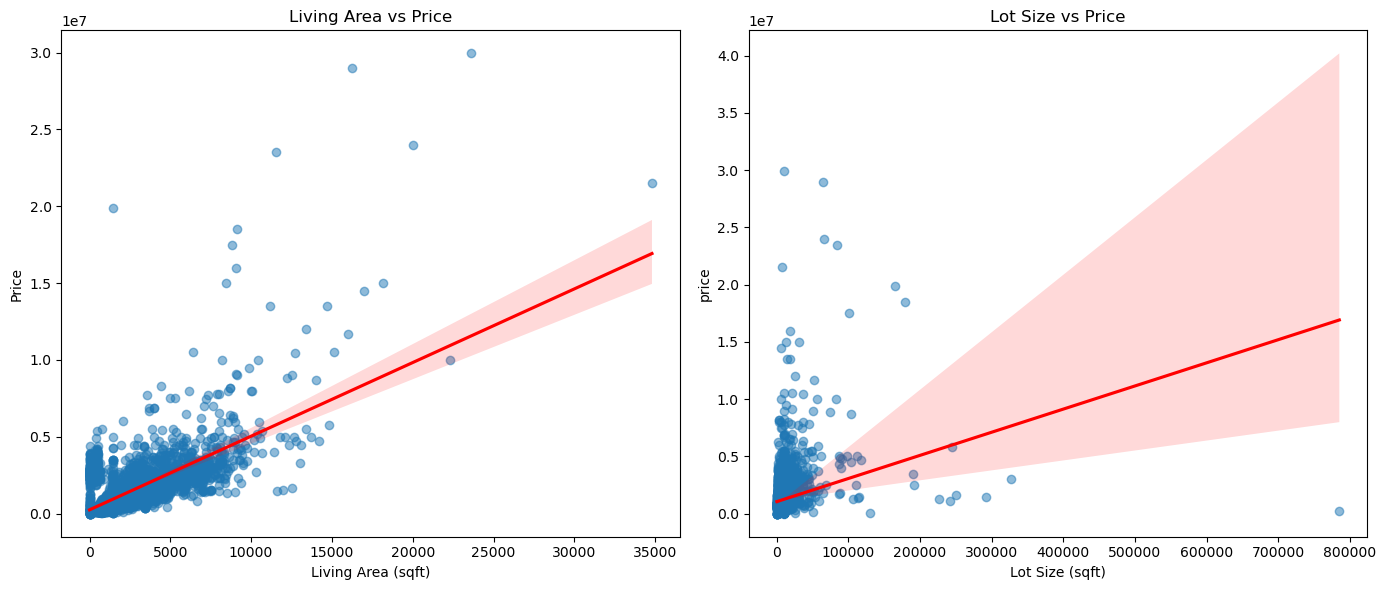

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.regplot(data=heavy_real_estate_data, x="livingArea", y="price", scatter_kws={'alpha':0.5}, ax=axes[0], line_kws={'color':'red'})
axes[0].set_title("Living Area vs Price")
axes[0].set_xlabel("Living Area (sqft)")
axes[0].set_ylabel("Price")

sns.regplot(data=heavy_real_estate_data, x="lotSize", y="price", scatter_kws={'alpha':0.5}, ax=axes[1], line_kws={'color':'red'})
axes[1].set_title("Lot Size vs Price")
axes[1].set_xlabel("Lot Size (sqft)")

plt.tight_layout()
plt.show()


The regression plot shows a strong positive relationship between living area and price. The p-value of 0.0 indicates that this relationship is statistically significant, meaning that the size of the living area has a real impact on home price. The R-squared value of 0.4167 means that about 42% of the variation in home prices can be explained by the living area, suggesting it's a strong predictor, though not the sole factor. Homes with larger living areas tend to have higher prices, but there are other influencing factors that contribute to the overall price.

The relationship between lot size and price is statistically significant, as indicated by the extremely low p-value. However, the R-squared value of 0.0486 reveals that lot size only explains a small fraction of the variation in home prices (roughly 5%). While lot size does impact price to some degree, it’s a much weaker predictor compared to living area. This suggests that factors like the quality of the home, location, and other amenities may play a larger role in determining price.

#### Visualizing relationship between yearBuilt and daysOnZillow


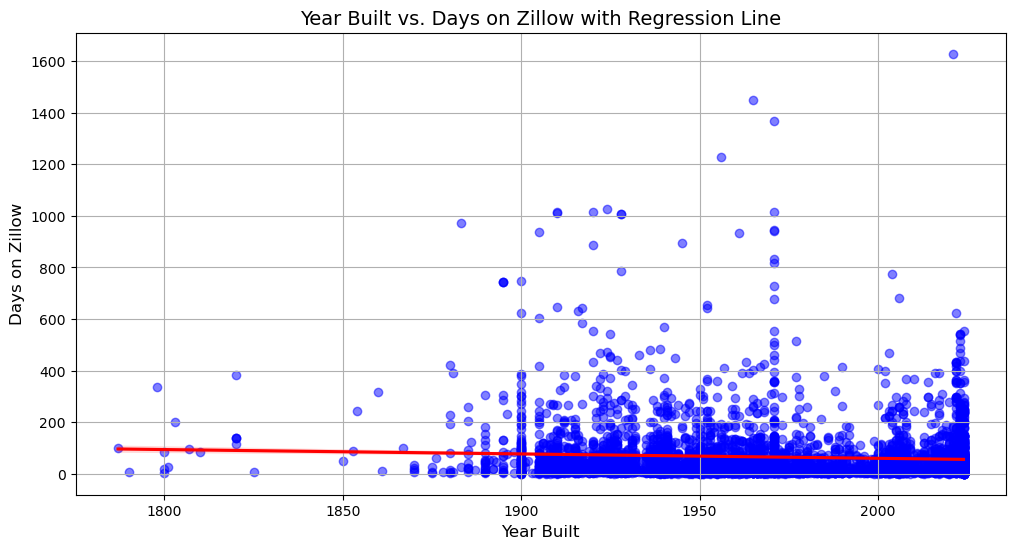

In [48]:
#Visualizing relationship between yearBuilt and daysOnZillow
plt.figure(figsize=(12, 6))
sns.regplot(
    data=heavy_real_estate_data,
    x="yearBuilt",
    y="daysOnZillow",
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title("Year Built vs. Days on Zillow with Regression Line", fontsize=14)
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Days on Zillow", fontsize=12)
plt.grid(True)
plt.show()


The regression plot analyzing the relationship between year built and days on Zillow shows that the year a house was built significantly influences how long the property stays listed on Zillow. A p-value this low confirms a statistically significant relationship.

Older homes may take longer to sell, potentially due to outdated features or less appeal compared to newer homes, which may be more modern or offer current features that buyers are looking for. Alternatively, newly constructed homes might sell faster due to their appeal, design, and the lack of wear and tear associated with older properties. The significant p-value indicates that year built is an important factor in predicting how long a property will remain on the market.